In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class ModelConfig:
    batch_size: int = 32
    acc_steps: int = 4
    seed: int = 0
    data_seed: int = 1337
    device: str = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    iterations: int = 25000
    lr: float = 1e-3
    warmup_percent: float = 0.05
    weight_decay: float = 0.1
    beta1: float = 0.9
    beta2: float = 0.95
    scheduler: str = 'cos'
    opt: str = 'adamw'
    eval_freq: int = 200
    results_base_folder: str = "./exps"
    grad_clip: float = 0.0
    dataset: str = 'slimpajama'
    vocab_size: int = 50304
    data_in_ram: bool = False
    model: str = 'base'
    use_pretrained: str = 'auto'
    dropout: float = 0.0
    activation: str = 'xrelu2'
    activation_p: float = 1.0
    activation_c: float = 0.0
    activation_alpha: float = 1.0
    activation_a: float = 0.0
    activation_k: float = 0.0
    n_head: int = 12
    n_layer: int = 12
    n_embd: int = 768
    sequence_length: int = 512
    dtype: torch.dtype = torch.bfloat16
    bias: bool = False
    # compile: bool = True
    rmsnorm_eps: float = 1e-5
    multiple_of: int = 256
    run_prefix: str = None
    exp_name: str = None
    wandb: bool = False
    wandb_project: str = "my-project"
    wandb_run_prefix: str = "none"
    eval_seq_prefix: str = "Once upon a time"
    
    
from src.models.base import GPTBase

# Create config and model
config = ModelConfig()
model = GPTBase(config)

# Path to .pt file
pt_file_path = "/home/s1612415/RDS/llm-baselines/exps/slimpajama/base/base_lr0.001_bs32x4_seqlen512/device=cuda:4_activation=xrelu2_compile=True_wandb_run_prefix=xrelu2_seed=0/ckpt.pt"

# Load the checkpoint
checkpoint = torch.load(pt_file_path)

# Remove the "_orig_mod." prefix from the state dict keys
state_dict = checkpoint['model']
new_state_dict = {}
for key in state_dict.keys():
    new_key = key.replace('_orig_mod.', '')
    new_state_dict[new_key] = state_dict[key]

# Load the modified state dict
model.load_state_dict(new_state_dict)

number of parameters: 123.59M


<All keys matched successfully>

transformer.h.0.mlp.activation.k 0.02546699158847332
transformer.h.1.mlp.activation.k 0.00010712092625908554
transformer.h.2.mlp.activation.k -0.07759413123130798
transformer.h.3.mlp.activation.k -0.06940341740846634
transformer.h.4.mlp.activation.k -0.09861145168542862
transformer.h.5.mlp.activation.k -0.0682855024933815
transformer.h.6.mlp.activation.k -0.11644098907709122
transformer.h.7.mlp.activation.k -0.19385908544063568
transformer.h.8.mlp.activation.k -0.30075886845588684
transformer.h.9.mlp.activation.k -0.34908536076545715
transformer.h.10.mlp.activation.k -0.336134135723114
transformer.h.11.mlp.activation.k 0.009225152432918549


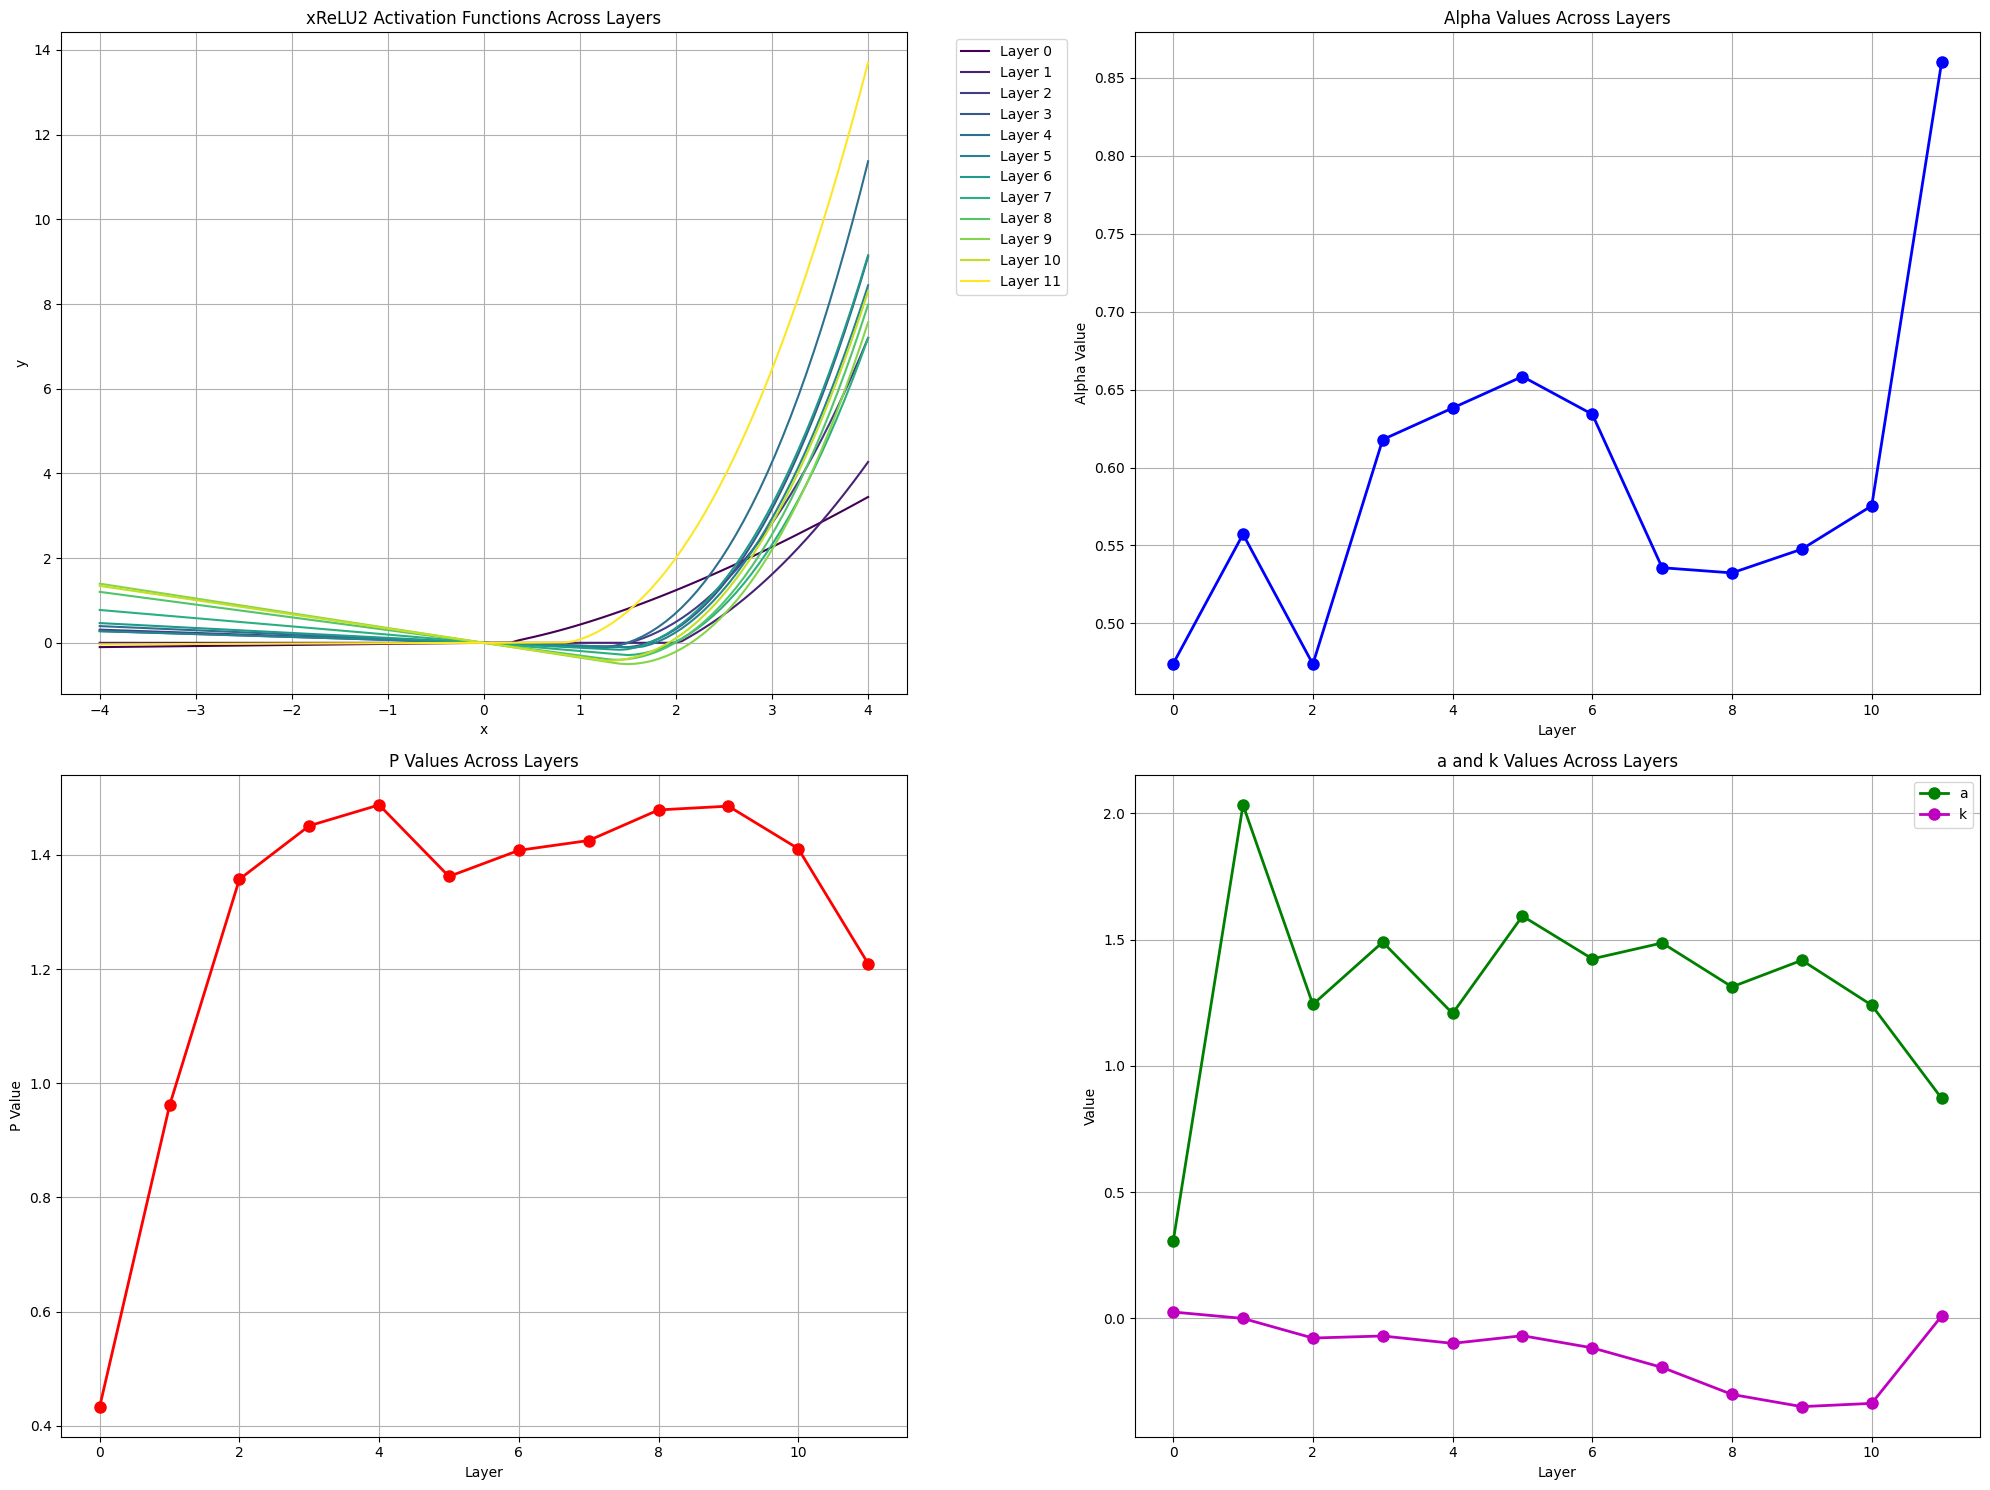

In [5]:
# Create lists to store parameter values for each layer
alphas = []
ps = []
as_ = []
ks = []

# Extract parameter values for each layer
for name, param in model.named_parameters():
    if 'activation' in name:
        value = param.item()
        if 'activation.alpha' in name:
            alphas.append(F.softplus(torch.tensor(value)).item())
        elif 'activation.p' in name:
            ps.append(F.softplus(torch.tensor(value)).item())
        elif 'activation.a' in name:
            as_.append(value)
        elif 'activation.k' in name:
            print(name, value)
            ks.append(value)

# Create layer indices and x values for plotting
layers = list(range(12))
x = torch.linspace(-4, 4, 100)

# Create figure with subplots
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

# Plot 1: Original activation functions plot
plt.subplot(2, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, 12))
for layer in range(12):
    y = x * (alphas[layer] * torch.pow(F.relu(x - as_[layer]), ps[layer]) + ks[layer])
    plt.plot(x.numpy(), y.numpy(), label=f'Layer {layer}', color=colors[layer])
plt.title('xReLU2 Activation Functions Across Layers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot 2: Alpha values
plt.subplot(2, 2, 2)
plt.plot(layers, alphas, 'bo-', linewidth=2, markersize=8)
plt.title('Alpha Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('Alpha Value')
plt.grid(True)

# Plot 3: P values
plt.subplot(2, 2, 3)
plt.plot(layers, ps, 'ro-', linewidth=2, markersize=8)
plt.title('P Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('P Value')
plt.grid(True)

# Plot 4: a and k values
plt.subplot(2, 2, 4)
plt.plot(layers, as_, 'go-', linewidth=2, markersize=8, label='a')
plt.plot(layers, ks, 'mo-', linewidth=2, markersize=8, label='k')
plt.title('a and k Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class ModelConfig:
    batch_size: int = 32
    acc_steps: int = 4
    seed: int = 0
    data_seed: int = 1337
    device: str = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    iterations: int = 25000
    lr: float = 1e-3
    warmup_percent: float = 0.05
    weight_decay: float = 0.1
    beta1: float = 0.9
    beta2: float = 0.95
    scheduler: str = 'cos'
    opt: str = 'adamw'
    eval_freq: int = 200
    results_base_folder: str = "./exps"
    grad_clip: float = 0.0
    dataset: str = 'slimpajama'
    vocab_size: int = 50304
    data_in_ram: bool = False
    model: str = 'base'
    use_pretrained: str = 'auto'
    dropout: float = 0.0
    activation: str = 'mrelu'
    activation_p: float = 1.0
    activation_c: float = 0.0
    activation_alpha: float = 1.0
    activation_a: float = 0.0
    activation_k: float = 0.0
    n_head: int = 12
    n_layer: int = 12
    n_embd: int = 768
    sequence_length: int = 512
    dtype: torch.dtype = torch.bfloat16
    bias: bool = False
    # compile: bool = True
    rmsnorm_eps: float = 1e-5
    multiple_of: int = 256
    run_prefix: str = None
    exp_name: str = None
    wandb: bool = False
    wandb_project: str = "my-project"
    wandb_run_prefix: str = "none"
    eval_seq_prefix: str = "Once upon a time"
    
    
from src.models.base import GPTBase

# Create config and model
config = ModelConfig()
model = GPTBase(config)

# Path to .pt file
pt_file_path = "/home/s1612415/RDS/llm-baselines/exps/slimpajama/base/base_lr0.001_bs32x4_seqlen512/device=cuda:2_activation=mrelu_compile=True_wandb_run_prefix=mrelu_seed=0/ckpt.pt"

# Load the checkpoint
checkpoint = torch.load(pt_file_path)

# Remove the "_orig_mod." prefix from the state dict keys
state_dict = checkpoint['model']
new_state_dict = {}
for key in state_dict.keys():
    new_key = key.replace('_orig_mod.', '')
    new_state_dict[new_key] = state_dict[key]

# Load the modified state dict
model.load_state_dict(new_state_dict)

number of parameters: 123.59M


<All keys matched successfully>

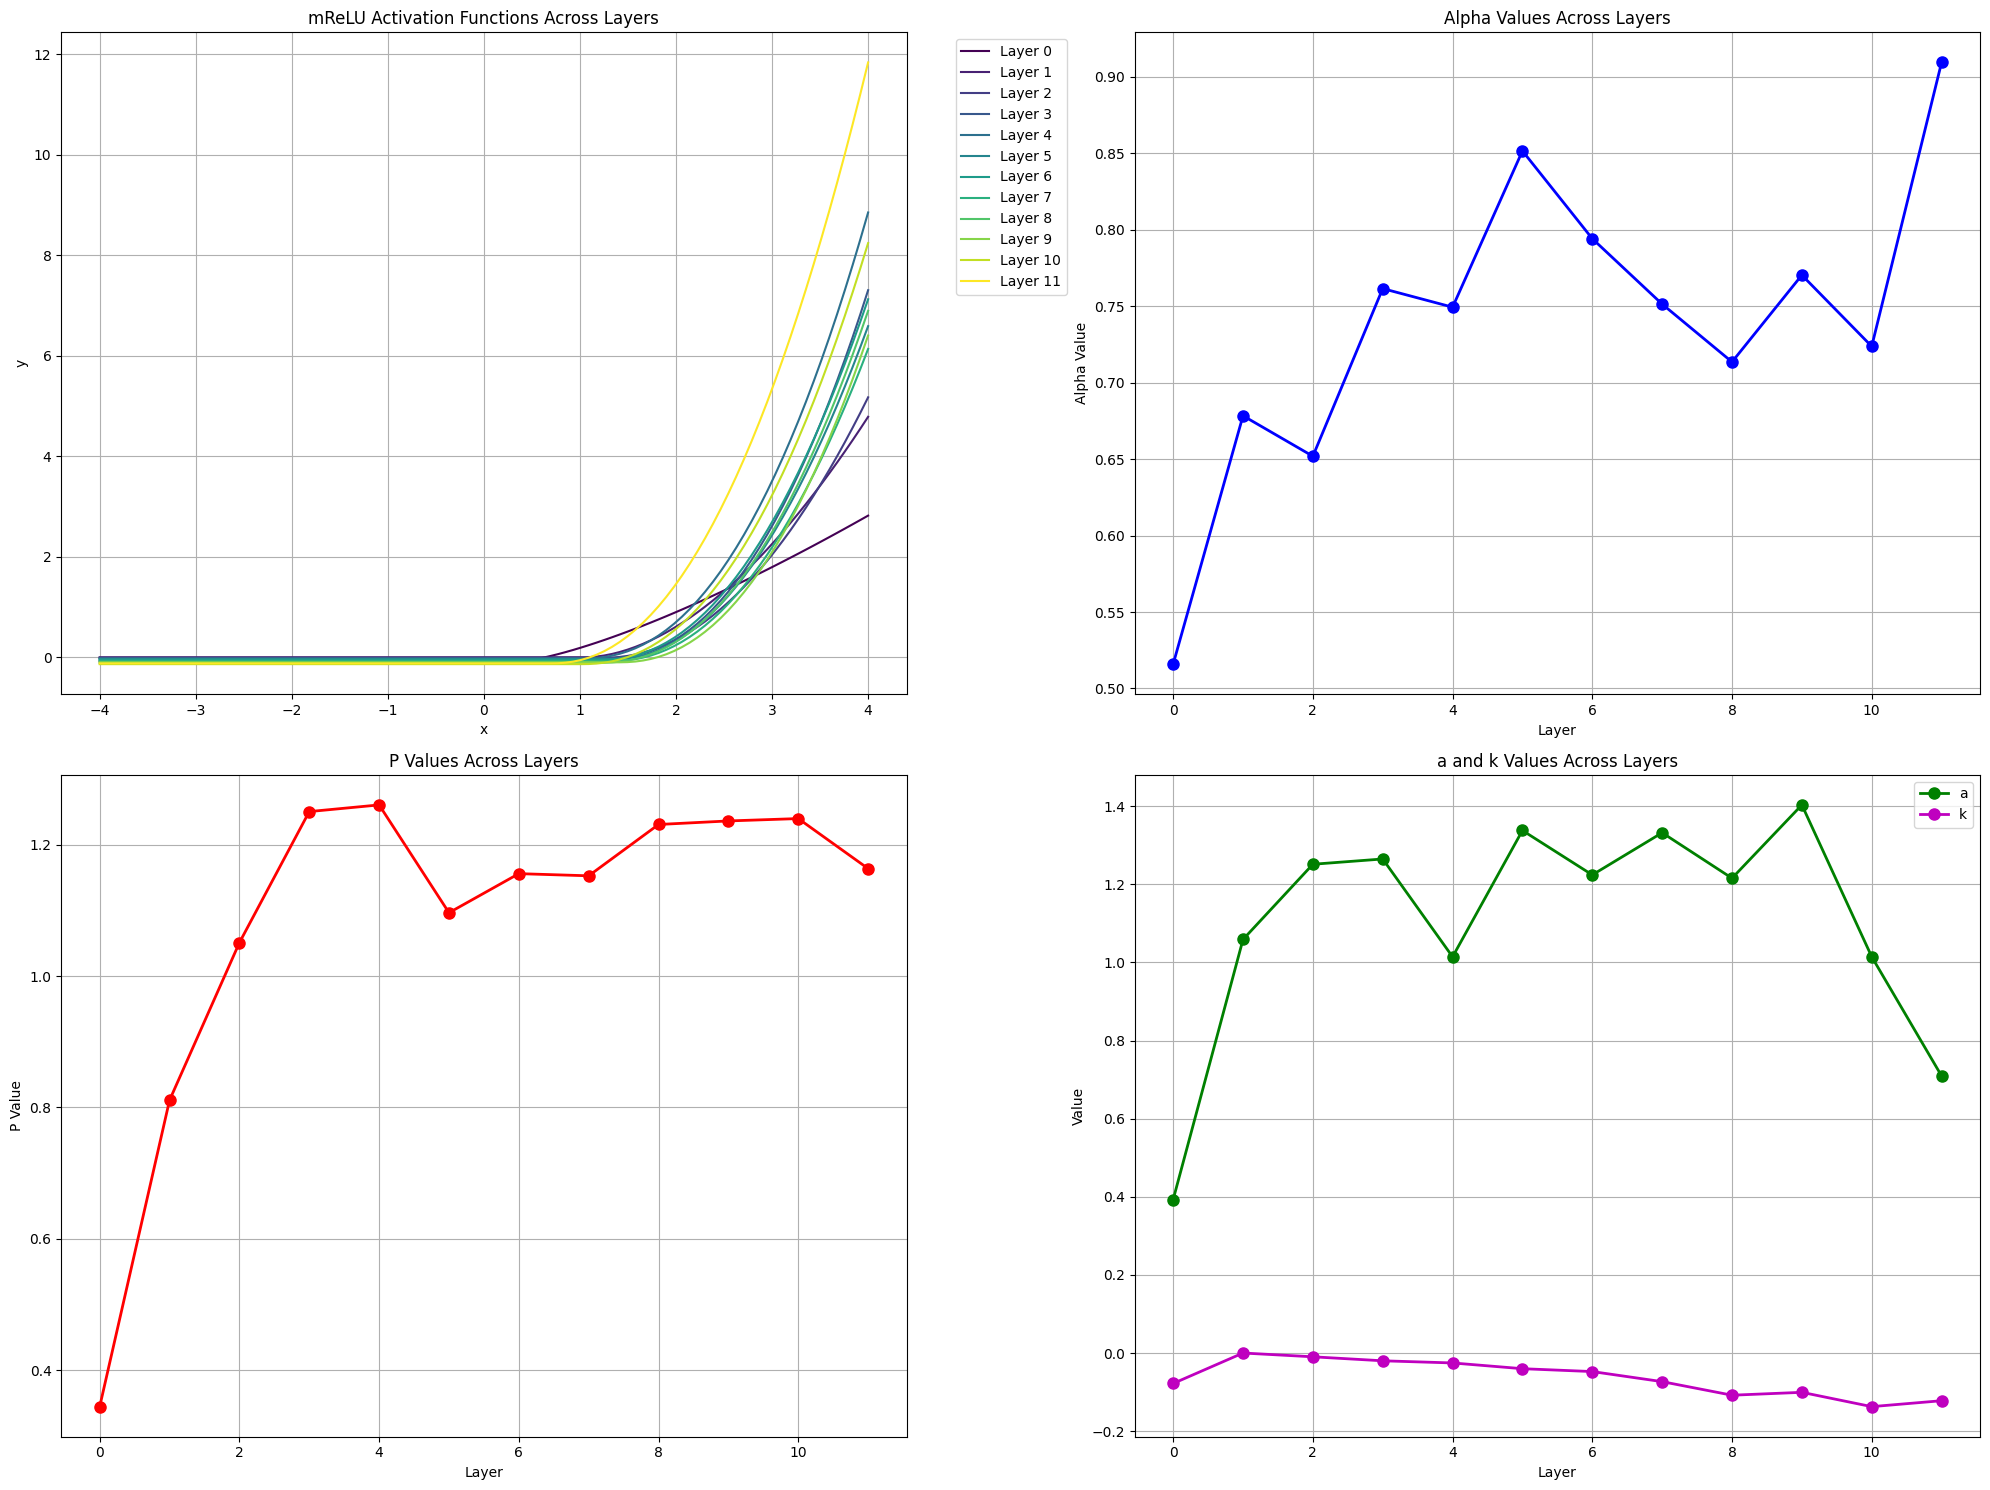

In [3]:
# Create lists to store parameter values for each layer
alphas = []
ps = []
as_ = []
ks = []

# Extract parameter values for each layer
for name, param in model.named_parameters():
    if 'activation' in name:
        value = param.item()
        if 'activation.alpha' in name:
            alphas.append(F.softplus(torch.tensor(value)).item())
        elif 'activation.p' in name:
            ps.append(F.softplus(torch.tensor(value)).item())
        elif 'activation.a' in name:
            as_.append(value)
        elif 'activation.k' in name:
            # print(name, value)
            ks.append(value)

# Create layer indices and x values for plotting
layers = list(range(12))
x = torch.linspace(-4, 4, 100)

# Create figure with subplots
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

# Plot 1: Original activation functions plot
plt.subplot(2, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, 12))
for layer in range(12):
    y = alphas[layer] * torch.pow(F.relu(x - as_[layer]), 1.0 + ps[layer]) + ks[layer]
    plt.plot(x.numpy(), y.numpy(), label=f'Layer {layer}', color=colors[layer])
plt.title('mReLU Activation Functions Across Layers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot 2: Alpha values
plt.subplot(2, 2, 2)
plt.plot(layers, alphas, 'bo-', linewidth=2, markersize=8)
plt.title('Alpha Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('Alpha Value')
plt.grid(True)

# Plot 3: P values
plt.subplot(2, 2, 3)
plt.plot(layers, ps, 'ro-', linewidth=2, markersize=8)
plt.title('P Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('P Value')
plt.grid(True)

# Plot 4: a and k values
plt.subplot(2, 2, 4)
plt.plot(layers, as_, 'go-', linewidth=2, markersize=8, label='a')
plt.plot(layers, ks, 'mo-', linewidth=2, markersize=8, label='k')
plt.title('a and k Values Across Layers')
plt.xlabel('Layer')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()